# Perceptron Learning Algorithm (PLA)
### 實作一個perceptron演算法來訓練Iris資料集。

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### ➤ 匯入Iris資料集

In [ ]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(x)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data.head(3)

### ➤ 選出花萼長度、花瓣長度以及花的種類欄位

In [ ]:
iris['target_names']

In [5]:
target_name = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

#### 為了簡單起見選出其中兩個特徵以及兩種花的種類。

In [ ]:
iris_data['target_name'] = iris_data['target'].map(target_name)
iris_data = iris_data[(iris_data['target_name'] == 'setosa')|(iris_data['target_name'] == 'versicolor')]
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target_name']]
iris_data.head(5)

###  ➤ 把target_name欄位的兩種花改成1,-1，主要是為了往後方便計算

In [7]:
target_class = {
    'setosa':1,
    'versicolor':-1
}

In [8]:
iris_data['target_class'] = iris_data['target_name'].map(target_class)

In [9]:
del iris_data['target_name']

In [ ]:
iris_data.head()

### 給定三個不同的iris資料集

In [ ]:
iris_data1, iris_data2, iris_data3 = iris_data, iris_data, iris_data
iris_data1 = iris_data1.drop(98)
iris_data2 = iris_data2.append({'sepal length (cm)':5, 'petal length (cm)':2.4, 'target_class':1},ignore_index=True)
iris_data3 = iris_data3.append({'sepal length (cm)':6.5, 'petal length (cm)':4.0, 'target_class':1},ignore_index=True)

In [ ]:
#視覺化
sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data=iris_data1, fit_reg=False, hue ='target_class')
plt.xlim(-0.5,7.5)
plt.ylim(5,-3)
sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data=iris_data2, fit_reg=False, hue ='target_class')
plt.xlim(-0.5,7.5)
plt.ylim(5,-3)
sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data=iris_data3, fit_reg=False, hue ='target_class')
plt.xlim(-0.5,7.5)
plt.ylim(5,-3)

# Perceptron Rule 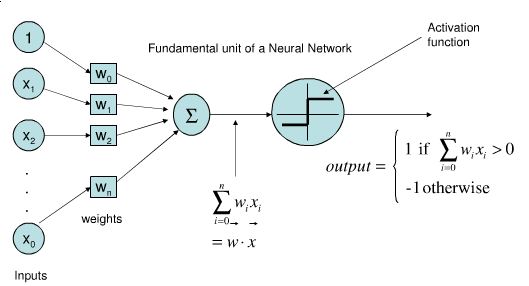

### Activation Function (激勵函數)

In [69]:
def sign(z):
    if z > 0:
        return None
    else:
        return None

### error &nbsp;:&nbsp;紀錄有沒有分類錯誤。&nbsp;iterator &nbsp;:&nbsp;紀錄更新了幾次。

In [89]:
def PLA(data) :
    w = np.array([0.,0.,0.])
    error = 1
    iterator = 0

    while error != 0:
        error = 0

        for i in range(len(data)):
            x,y = np.concatenate((np.array([1.]), np.array(data.iloc[i])[:2])), np.array(data.iloc[i])[2]
            
            #如果分類錯誤
            if sign(np.dot(w,x)) != None:
                print("iterator: "+str(iterator))
                iterator += 1
                error += 1
                sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data=data, fit_reg=False, hue ='target_class')

                # 前一個Decision boundary 的法向量
                if w[1] != 0:
                    x_last_decision_boundary = np.linspace(0,w[1])
                    y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
                    plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
                
                #更新w
                w += None
                print("x: " + str(x))            
                print("w: " + str(w))

                # x向量 
                x_vector = np.linspace(0,x[1])
                y_vector = (x[2]/x[1])*x_vector
                plt.plot(x_vector, y_vector,'b')

                # Decision boundary 的方向向量
                x_decision_boundary = np.linspace(-0.5,7)
                y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
                plt.plot(x_decision_boundary, y_decision_boundary,'r')

                # Decision boundary 的法向量
                x_decision_boundary_normal_vector = np.linspace(0,w[1])
                y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
                plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
                plt.xlim(-0.5,7.5)
                plt.ylim(5,-3)
                plt.show()


### 帶入  iris_data1

In [1]:
PLA(iris_data1)

NameError: name 'PLA' is not defined

### 帶入 iris_data2

In [ ]:
PLA(iris_data2)

### 帶入 iris_data3

In [ ]:
PLA(iris_data3)